In [1]:
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv(r"C:\Users\mahmoud\Desktop\Cellula intern\first inten project.csv")

In [3]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
df.tail()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
36284,INN36286,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [5]:
# Q1: what is the distribution of booking status(canceled vs not_canceled) ?
status_counts = df['booking status'].value_counts()
print(status_counts)

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64


C:\Users\mahmoud\AppData\Local\Temp\ipykernel_27632\2151949690.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




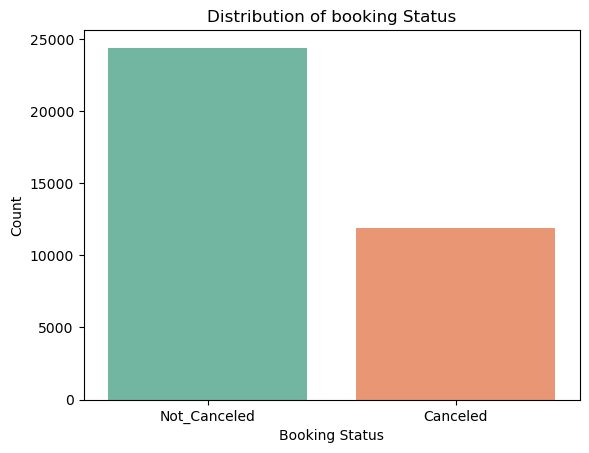

In [6]:
sns.countplot(data=df, x='booking status',palette='Set2')
plt.title('Distribution of booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()

reservation_month
April        2737
August       3813
December     3022
February     1668
January      1014
July         2921
June         3203
March        2358
May          2599
November     2981
October      5320
September    4612
Name: count, dtype: int64


C:\Users\mahmoud\AppData\Local\Temp\ipykernel_27632\3079550443.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




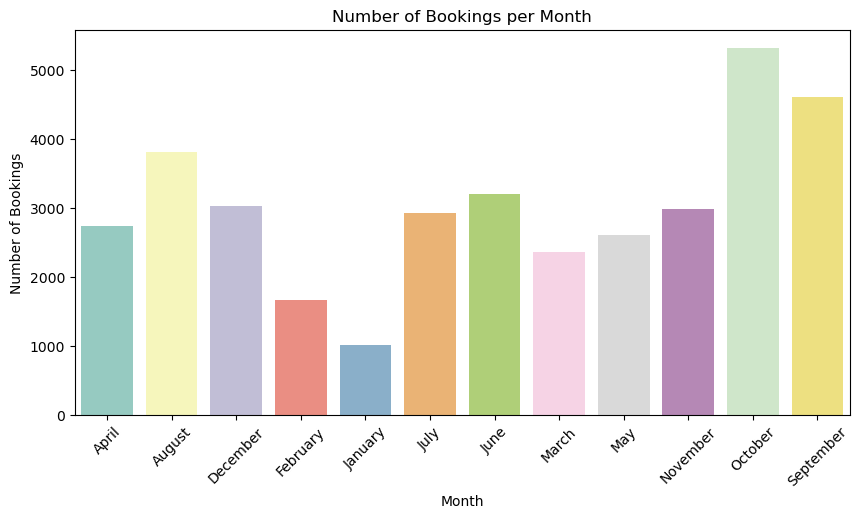

In [7]:
# Q2:How many bookings are made per month ?

# Convert date column to datetime format
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')

# Drop rows with invalid dates (NaT)
df = df.dropna(subset=['date of reservation'])

# Extract month name
df['reservation_month'] = df['date of reservation'].dt.month_name()

# Count bookings per month
monthly_counts = df['reservation_month'].value_counts().sort_index()  # sort for chronological order

# Display the counts
print(monthly_counts)

# Optional: Plot the result
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='reservation_month', order=monthly_counts.index, palette='Set3')
plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


Average number of adults per booking: 1.85
Average number of children per booking: 0.11


C:\Users\mahmoud\AppData\Local\Temp\ipykernel_27632\1371546422.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




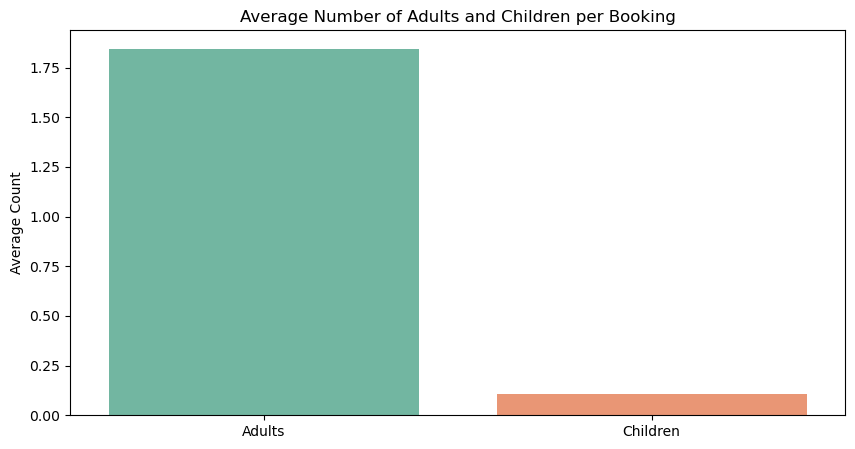

In [29]:
# Q3: What is the average number of adults and children per booking?
avg_adults = df['number of adults'].mean()
avg_children = df['number of children'].mean()

print(f"Average number of adults per booking: {avg_adults:.2f}")
print(f"Average number of children per booking: {avg_children:.2f}")

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=['Adults', 'Children'], y=[avg_adults, avg_children], palette="Set2")
plt.title('Average Number of Adults and Children per Booking')
plt.ylabel('Average Count')
plt.show()


Most common room types:
room type
Room_Type 1    28113
Room_Type 4     6051
Room_Type 6      964
Room_Type 2      692
Room_Type 5      263
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


C:\Users\mahmoud\AppData\Local\Temp\ipykernel_5620\4138362831.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




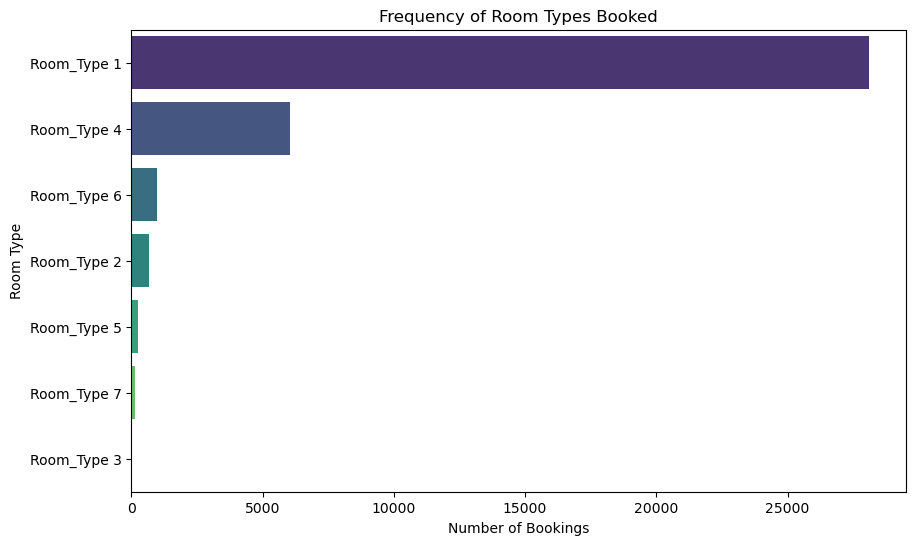

In [12]:
# Q4: What is the most common room type booked?
room_type_counts = df['room type'].value_counts()

print("\nMost common room types:")
print(room_type_counts)

# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='room type', order=room_type_counts.index, palette="viridis")
plt.title('Frequency of Room Types Booked')
plt.xlabel('Number of Bookings')
plt.ylabel('Room Type')
plt.show()


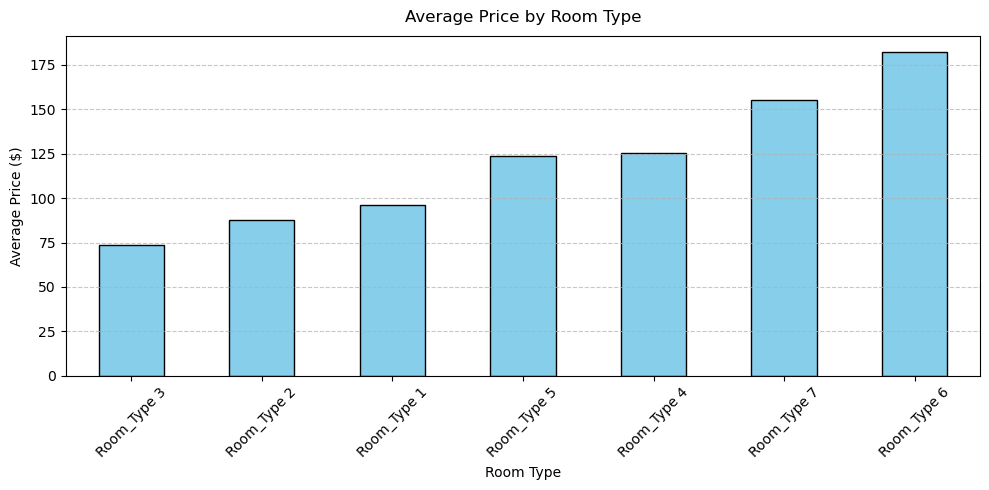

In [9]:
# Q5: Is there a relationship between room type and average price?
plt.figure(figsize=(10, 5))

# Calculate average price by room type
avg_prices = df.groupby('room type')['average price '].mean().sort_values()

# Simple bar chart
avg_prices.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Price by Room Type', pad=10)
plt.xlabel('Room Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Meal plan selection counts:
type of meal
Meal Plan 1     27809
Not Selected     5131
Meal Plan 2      3303
Meal Plan 3         5
Name: count, dtype: int64


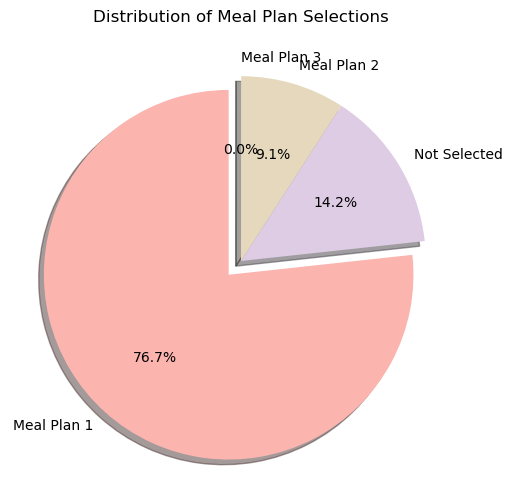

In [14]:
# Q6. Which meal plan is most selected by guests?
meal_counts = df['type of meal'].value_counts()

print("\nMeal plan selection counts:")
print(meal_counts)

# Visualization
plt.figure(figsize=(10, 6))
explode = (0.1, 0, 0, 0)  # explode the most popular slice
meal_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                explode=explode, shadow=True, cmap='Pastel1')
plt.title('Distribution of Meal Plan Selections')
plt.ylabel('')
plt.show()

C:\Users\mahmoud\AppData\Local\Temp\ipykernel_27632\872478689.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



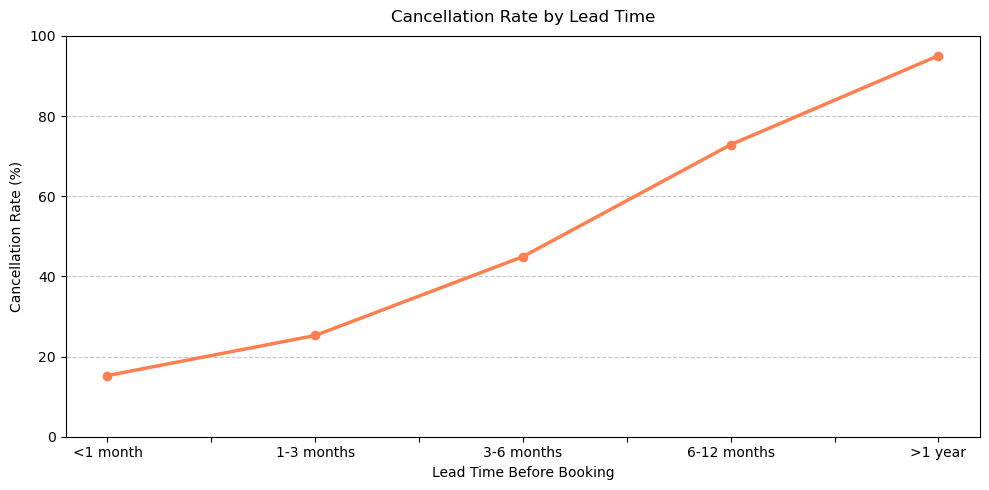

In [12]:
# Q7: Do longer lead times correlate with cancellation rates?

plt.figure(figsize=(10, 5))

# Create lead time categories
bins = [0, 30, 90, 180, 365, np.inf]
labels = ['<1 month', '1-3 months', '3-6 months', '6-12 months', '>1 year']
df['lead_time_cat'] = pd.cut(df['lead time'], bins=bins, labels=labels)
df['is_canceled'] = df['booking status'].apply(lambda x: 1 if x == 'Canceled' else 0)
# Calculate cancellation rates
cancel_rates = df.groupby('lead_time_cat')['is_canceled'].mean() * 100

# Simple line chart
cancel_rates.plot(kind='line', marker='o', color='coral', linewidth=2.5)

plt.title('Cancellation Rate by Lead Time', pad=10)
plt.xlabel('Lead Time Before Booking')
plt.ylabel('Cancellation Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Bookings by market segment:
market segment type
Online           23201
Offline          10521
Corporate         2011
Complementary      390
Aviation           125
Name: count, dtype: int64


C:\Users\mahmoud\AppData\Local\Temp\ipykernel_27632\3179213067.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




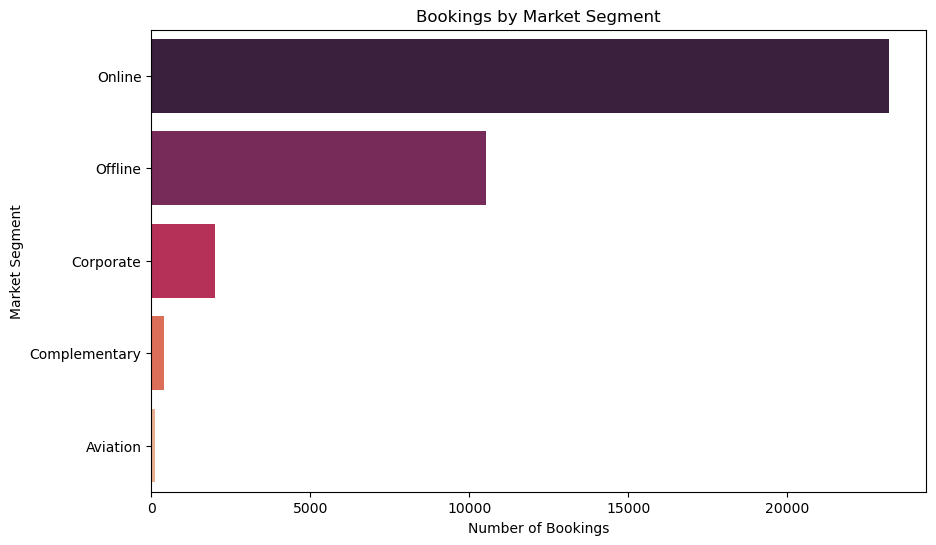

In [11]:
# Q8: Which market segment contributes most to bookings?
market_segment_counts = df['market segment type'].value_counts()

print("\nBookings by market segment:")
print(market_segment_counts)

# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='market segment type', order=market_segment_counts.index, palette="rocket")
plt.title('Bookings by Market Segment')
plt.xlabel('Number of Bookings')
plt.ylabel('Market Segment')
plt.show()



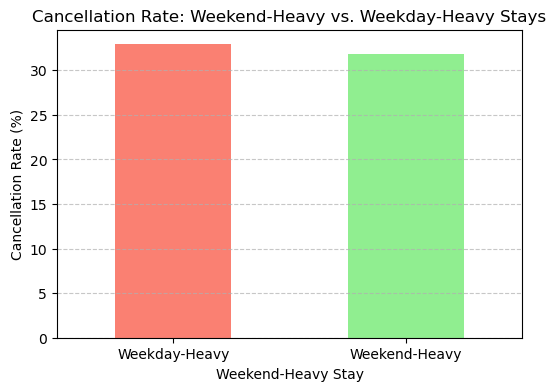

In [17]:
# Q9:Do weekend bookings have a higher cancellation rate than weekday bookings ? 

df['total_nights'] = df['number of weekend nights'] + df['number of week nights']
df['is_weekend_heavy'] = df['number of weekend nights'] > df['number of week nights']
cancellation_rate = df.groupby('is_weekend_heavy')['booking status'].apply(lambda x: (x == 'Canceled').mean() * 100)
plt.figure(figsize=(6, 4))
cancellation_rate.plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Cancellation Rate: Weekend-Heavy vs. Weekday-Heavy Stays')
plt.xlabel('Weekend-Heavy Stay')
plt.ylabel('Cancellation Rate (%)')
plt.xticks([0, 1], ['Weekday-Heavy', 'Weekend-Heavy'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

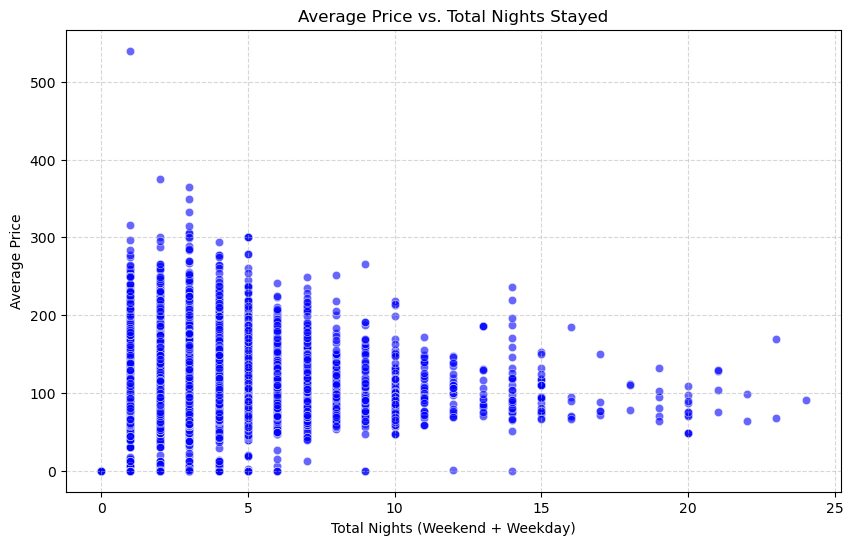

In [20]:
# Q10 :Is there a relationship between the average price and the number of nights stayed ?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_nights', y='average price ', alpha=0.6, color='blue')
plt.title('Average Price vs. Total Nights Stayed')
plt.xlabel('Total Nights (Weekend + Weekday)')
plt.ylabel('Average Price')
plt.grid(linestyle='--', alpha=0.5)
plt.show()


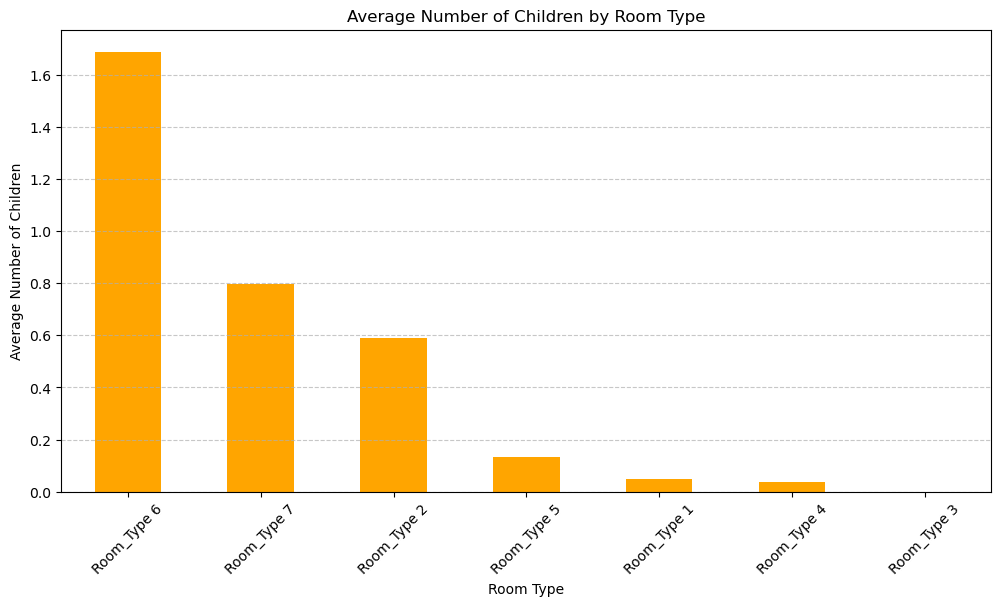

In [23]:
# Q11 :How does the number of children affect the room type selection?
children_by_room = df.groupby('room type')['number of children'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
children_by_room.plot(kind='bar', color='orange')
plt.title('Average Number of Children by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Number of Children')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


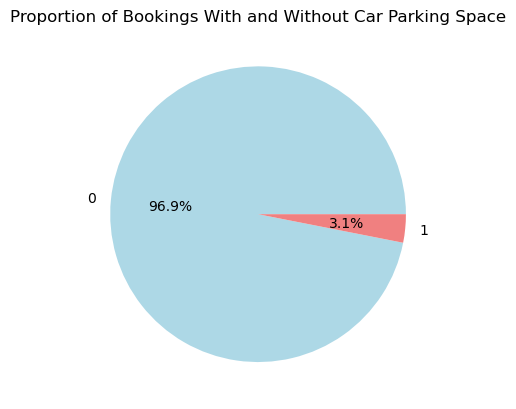

In [25]:
# Q12: What is the proportion of bookings with and without car parking space ?
parking_counts = df['car parking space'].value_counts(normalize=True) * 100

parking_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Proportion of Bookings With and Without Car Parking Space')
plt.ylabel('')
plt.show()

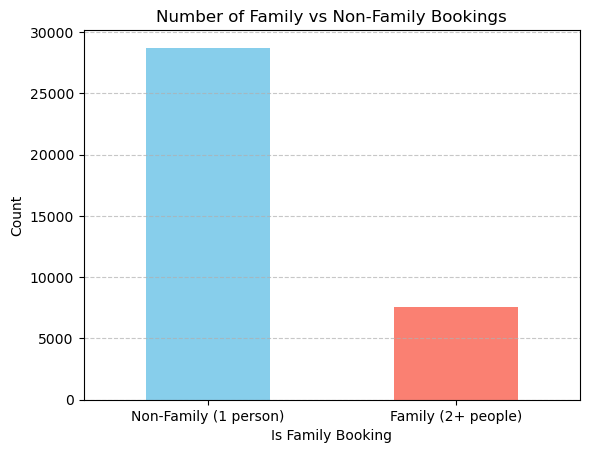

In [27]:
# Q13: How many bookings are made by families (adults + children > 1)?
df['is_family'] = (df['number of adults'] + df['number of children']) > 1

family_counts = df['is_family'].value_counts()
family_proportion = df['is_family'].value_counts(normalize=True) * 100

family_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Family vs Non-Family Bookings')
plt.xlabel('Is Family Booking')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Family (1 person)', 'Family (2+ people)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()